## **Import Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import RocCurveDisplay # Corrected import
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## **Import Dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


## **Explore Data Analysis**

In [ ]:
# Read the CSV file
Orginal_data = pd.read_csv(f"{path}/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

data = pd.read_csv(f"{path}/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

# Display dataset structure
data.shape

(253680, 22)

# **data quality**

In [ ]:
# Check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Display first few rows
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Check for missing values
data.isnull().sum()


,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
# Check for duplicate rows
data.duplicated().sum()

np.int64(24206)

In [ ]:
data.dtypes

,0
Diabetes_binary,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


# **tranfrom to int**


In [ ]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int)
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
data.isnull().sum()


,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


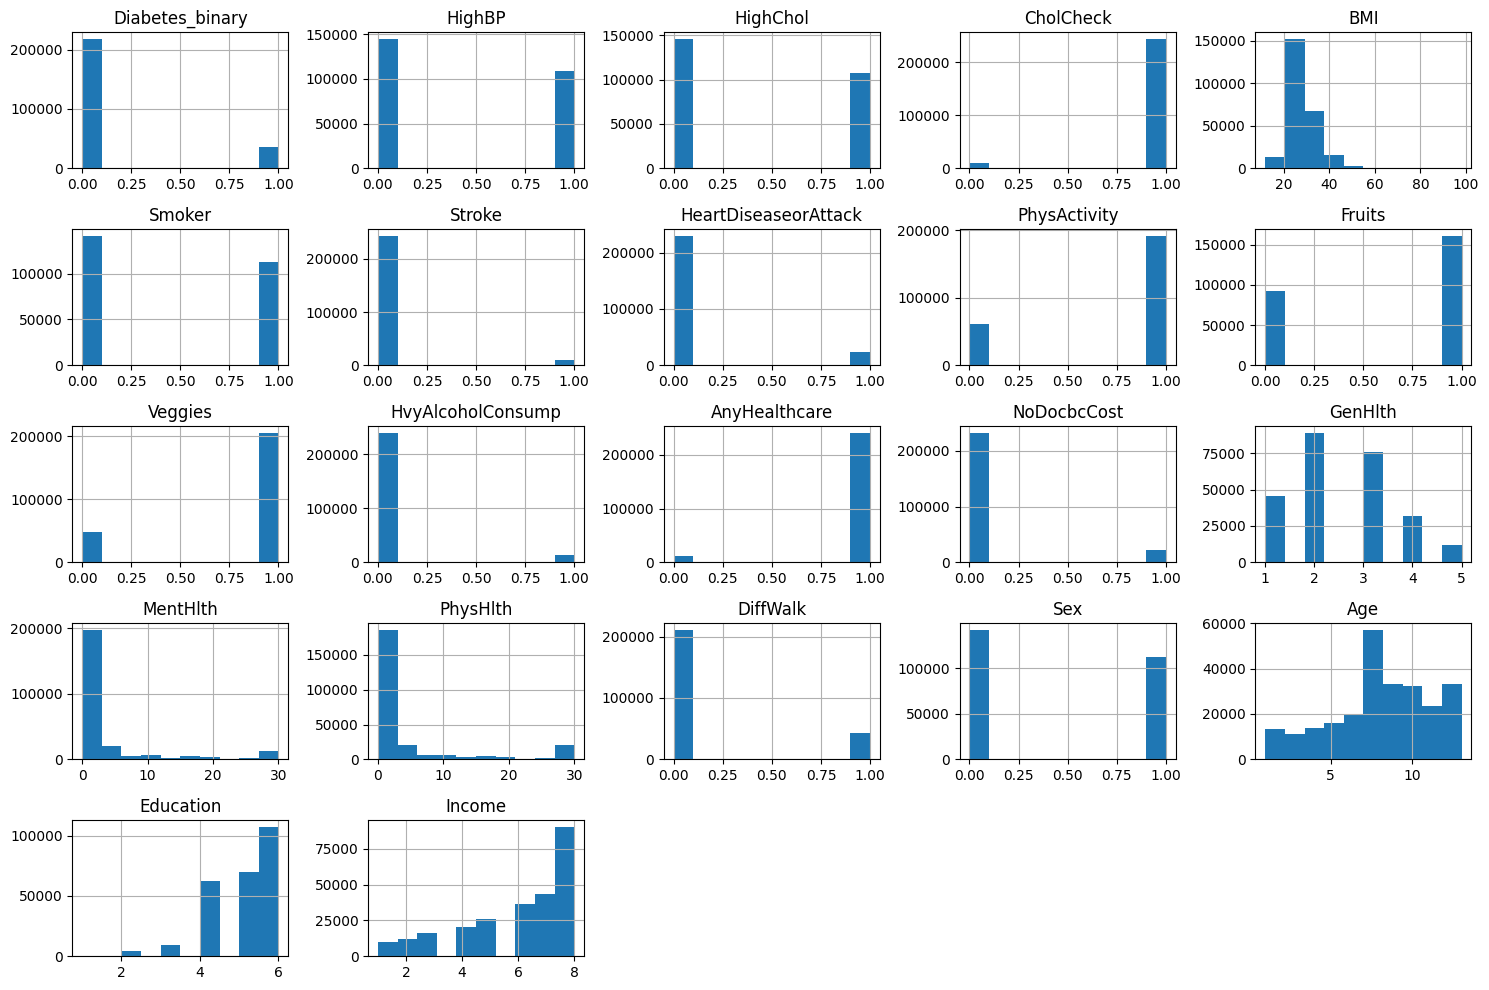

In [ ]:
# Visualize the distribution of each column
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

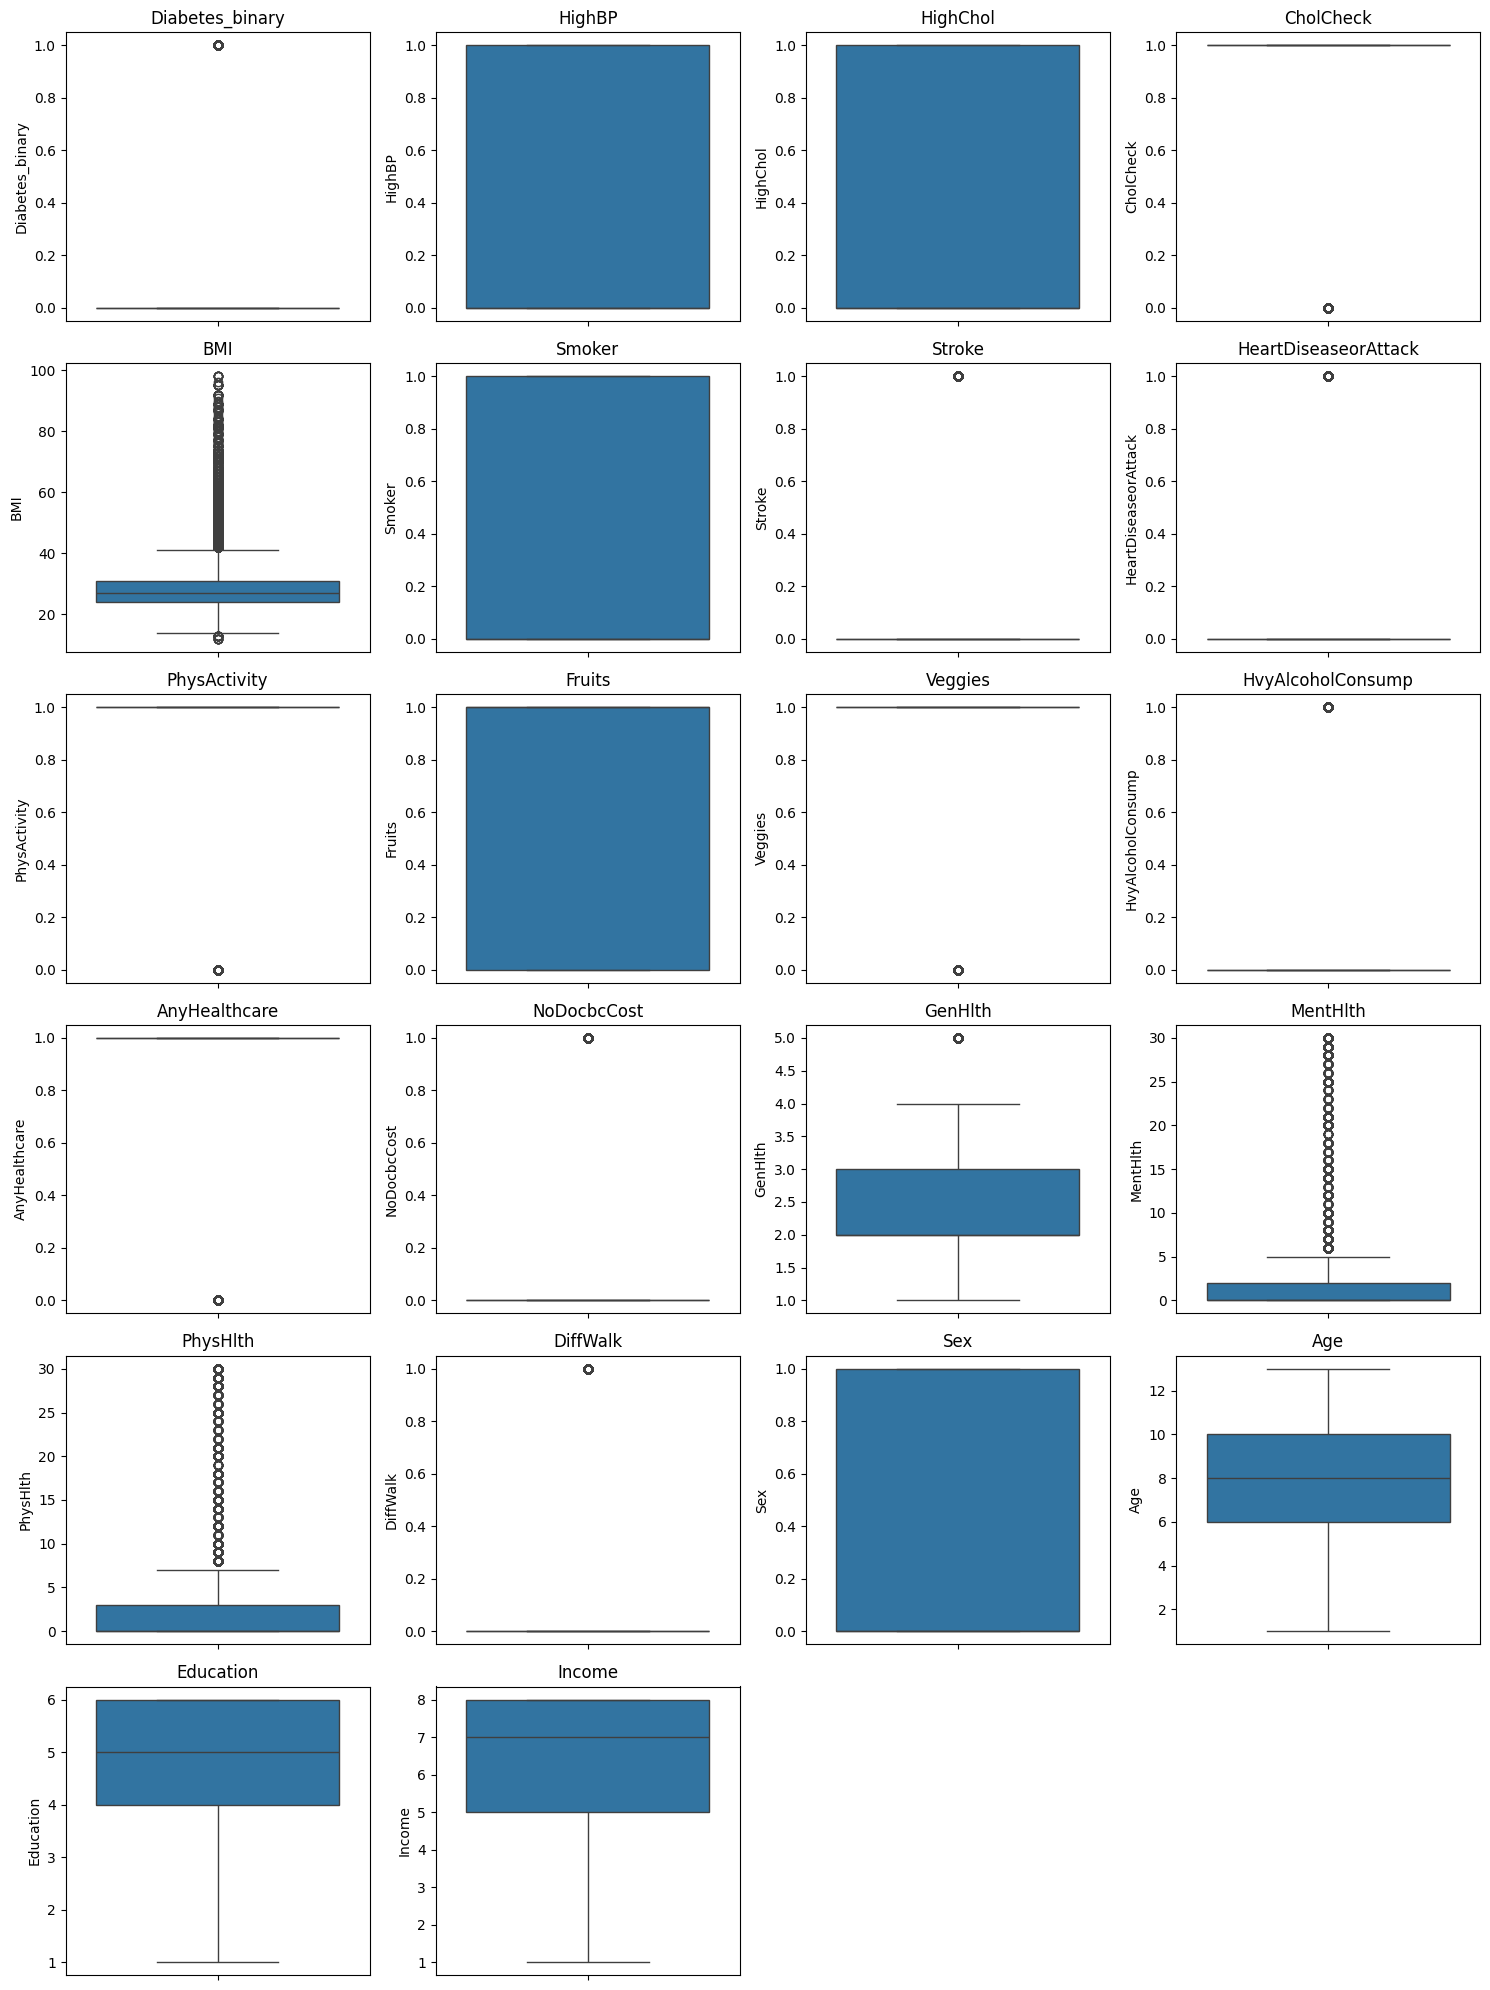

In [ ]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Create boxplots for numerical columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

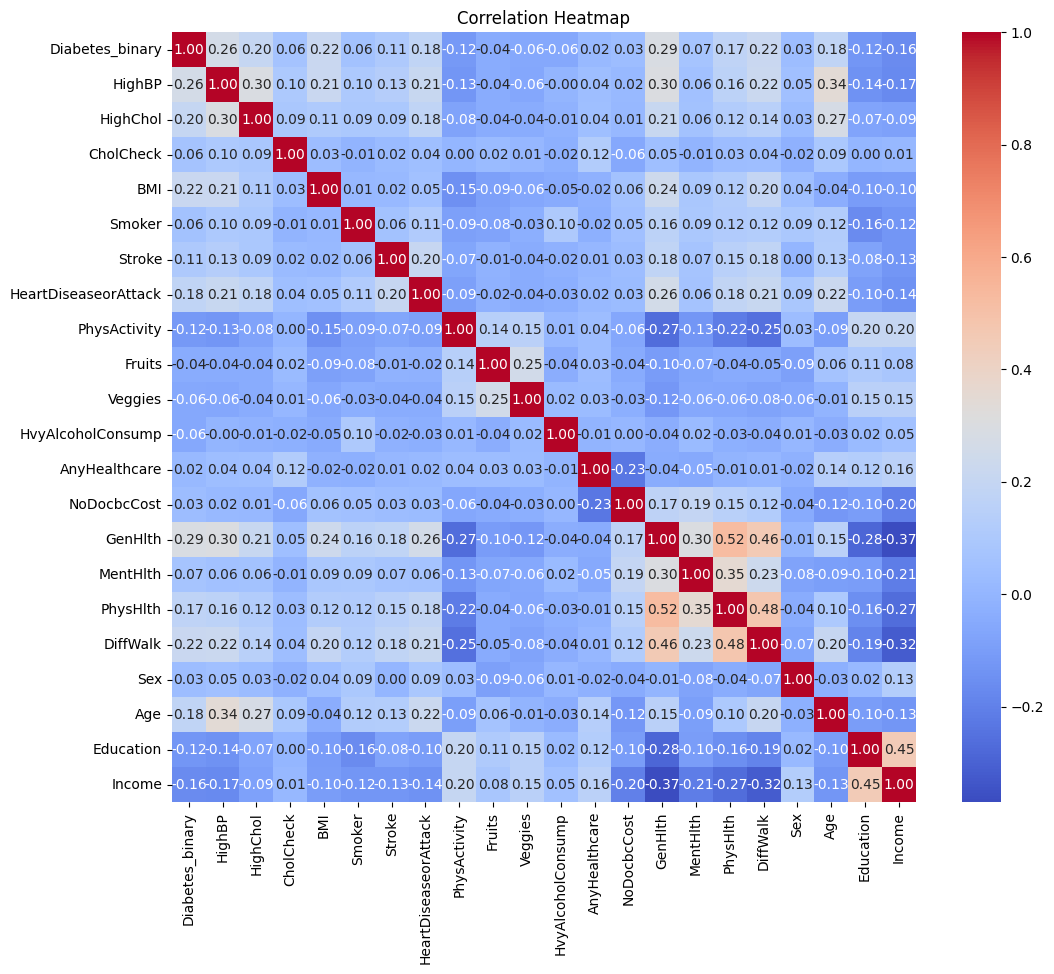

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.duplicated().sum()

np.int64(24206)

In [ ]:
data.drop_duplicates(inplace = True)


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(229474, 22)

In [ ]:
data["Diabetes_binary"]= data["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

In [ ]:
data2 = data.copy()

In [ ]:
data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

In [ ]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [ ]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

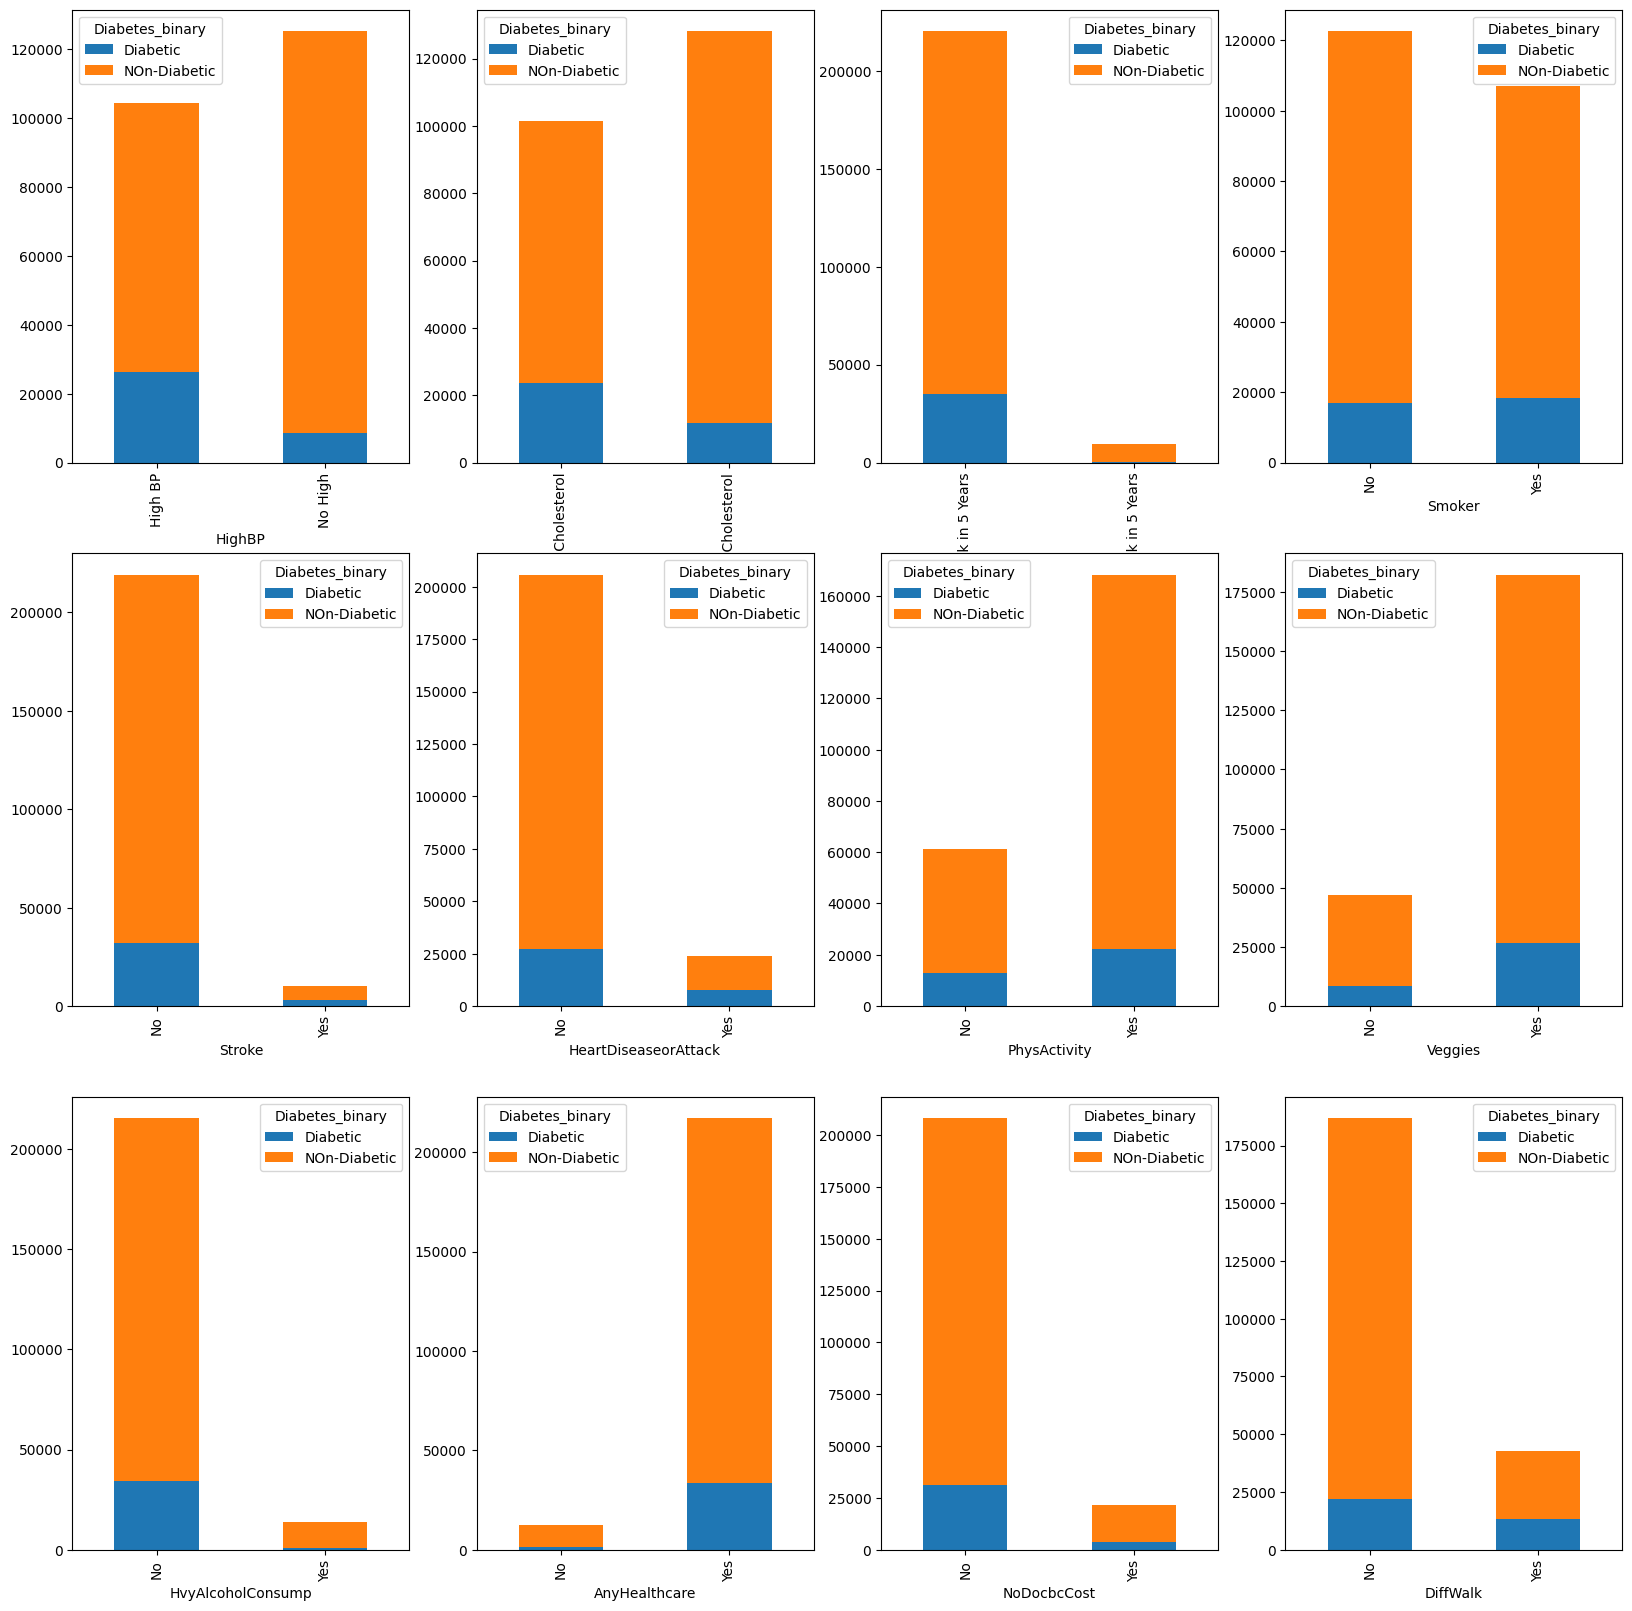

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

In [ ]:
data2["Diabetes_binary"].value_counts()

,count
Diabetes_binary,
NOn-Diabetic,194377
Diabetic,35097


<Axes: xlabel='count', ylabel='Diabetes_binary'>

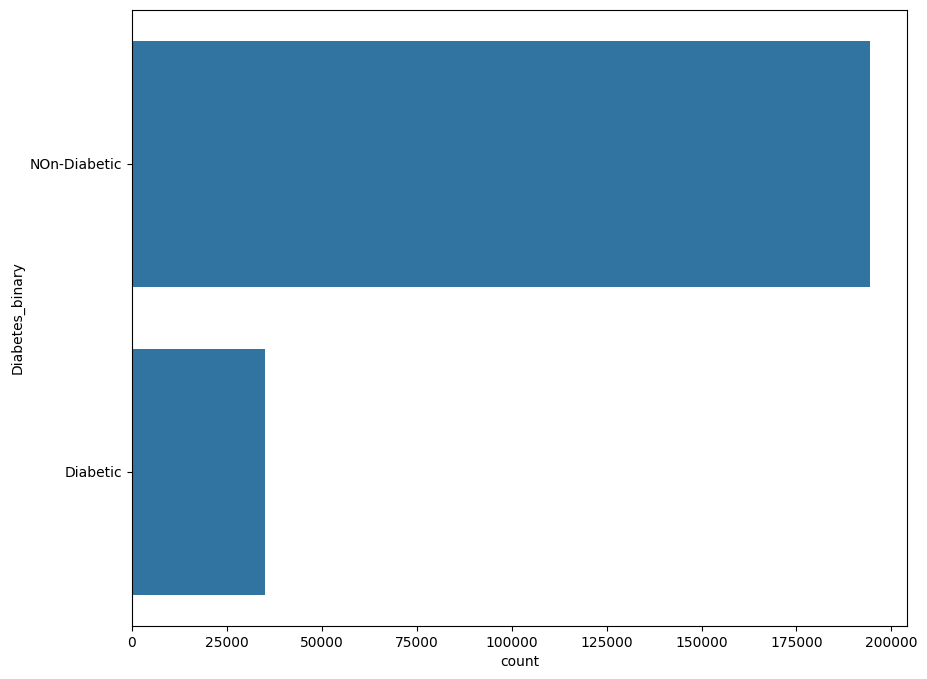

In [ ]:
figure1, plot1 = plt.subplots(figsize=(10,8))

sns.countplot(data2['Diabetes_binary'])

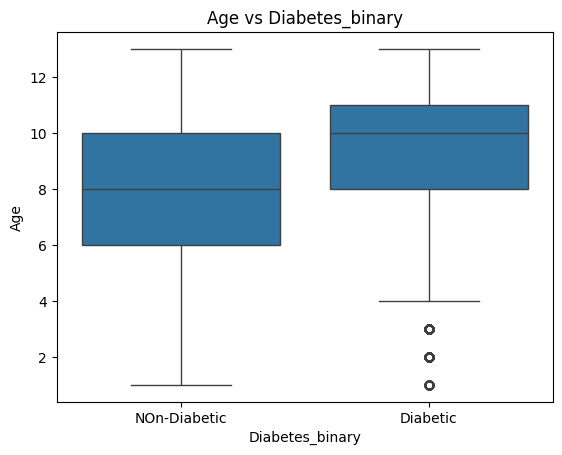

In [ ]:
sns.boxplot(x = 'Diabetes_binary', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary')
plt.show()

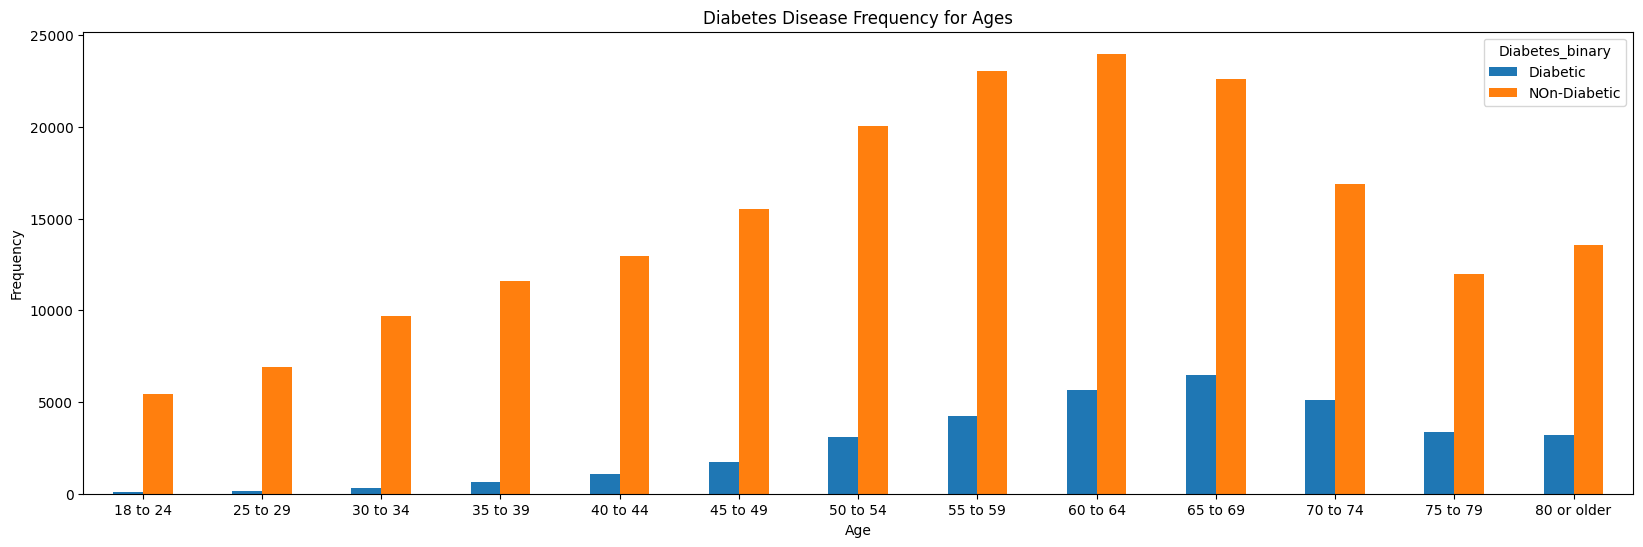

In [ ]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

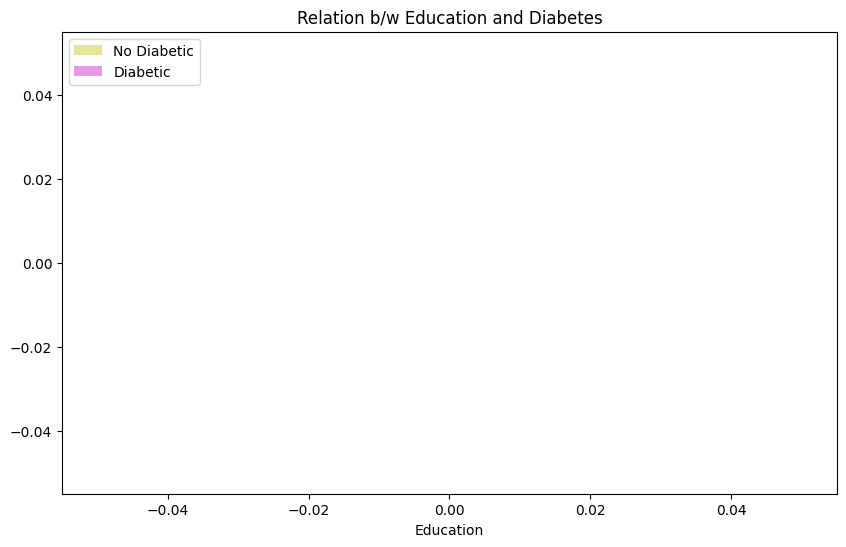

In [ ]:
plt.figure(figsize=(10,6))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

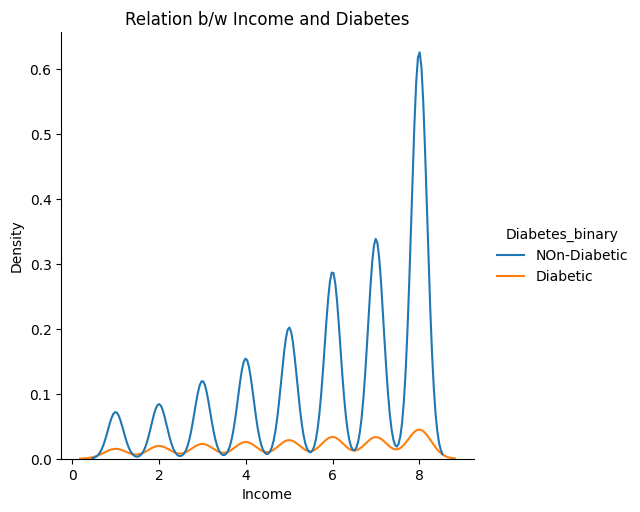

In [ ]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary", kind="kde")
plt.title("Relation b/w Income and Diabetes")

In [ ]:
# plt.figure(figsize=(25, 15))

# sns.countplot(data.BMI[data.Diabetes_binary == 0], color="r", label="No Diabetic")
# sns.countplot(data.BMI[data.Diabetes_binary == 1], color="g", label="Diabetic")
# plt.title("Relation b/w BMI and Diabetes")

# plt.legend()

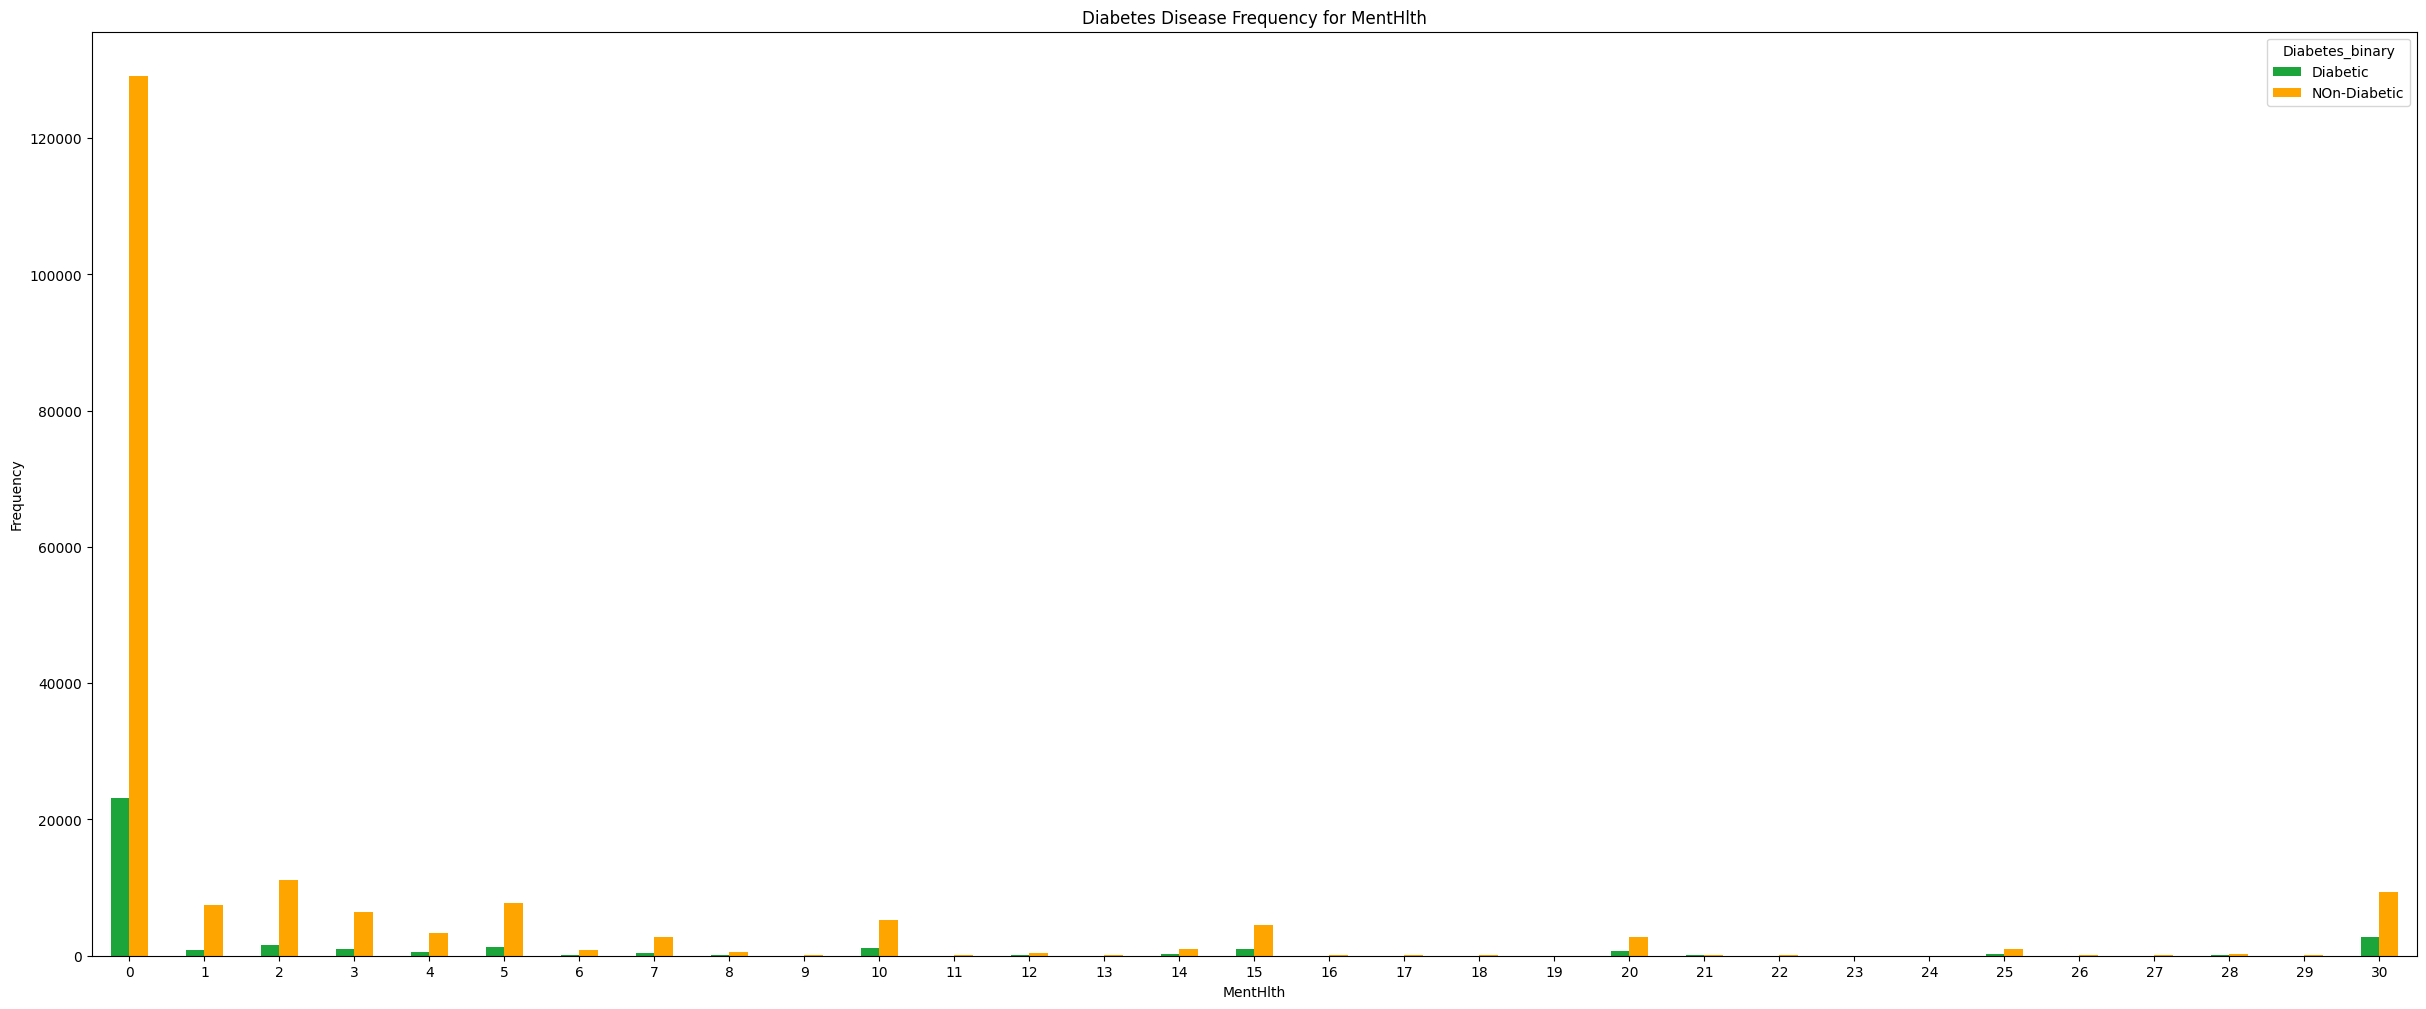

In [ ]:
pd.crosstab(data.MentHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

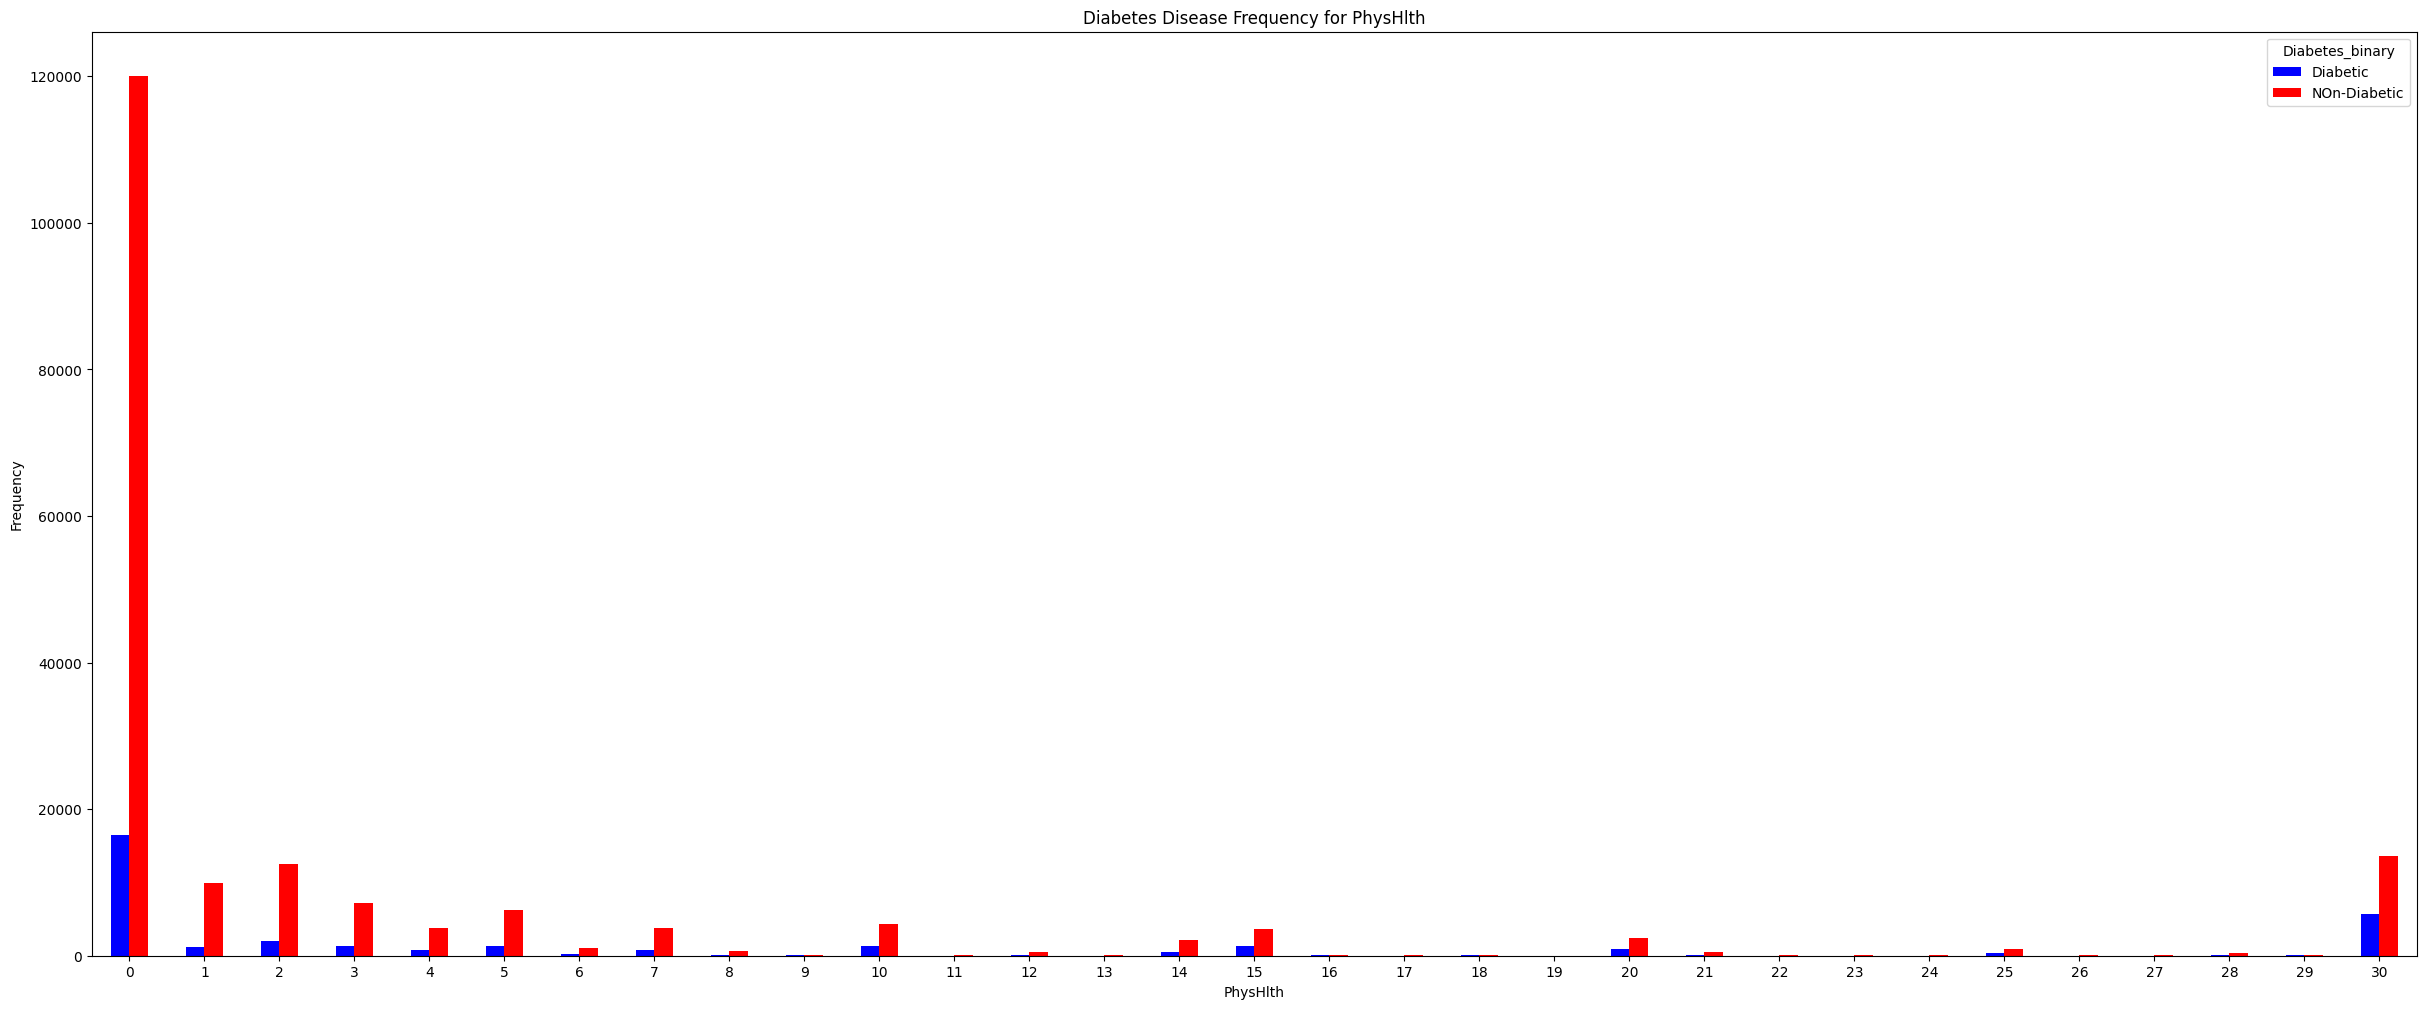

In [ ]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

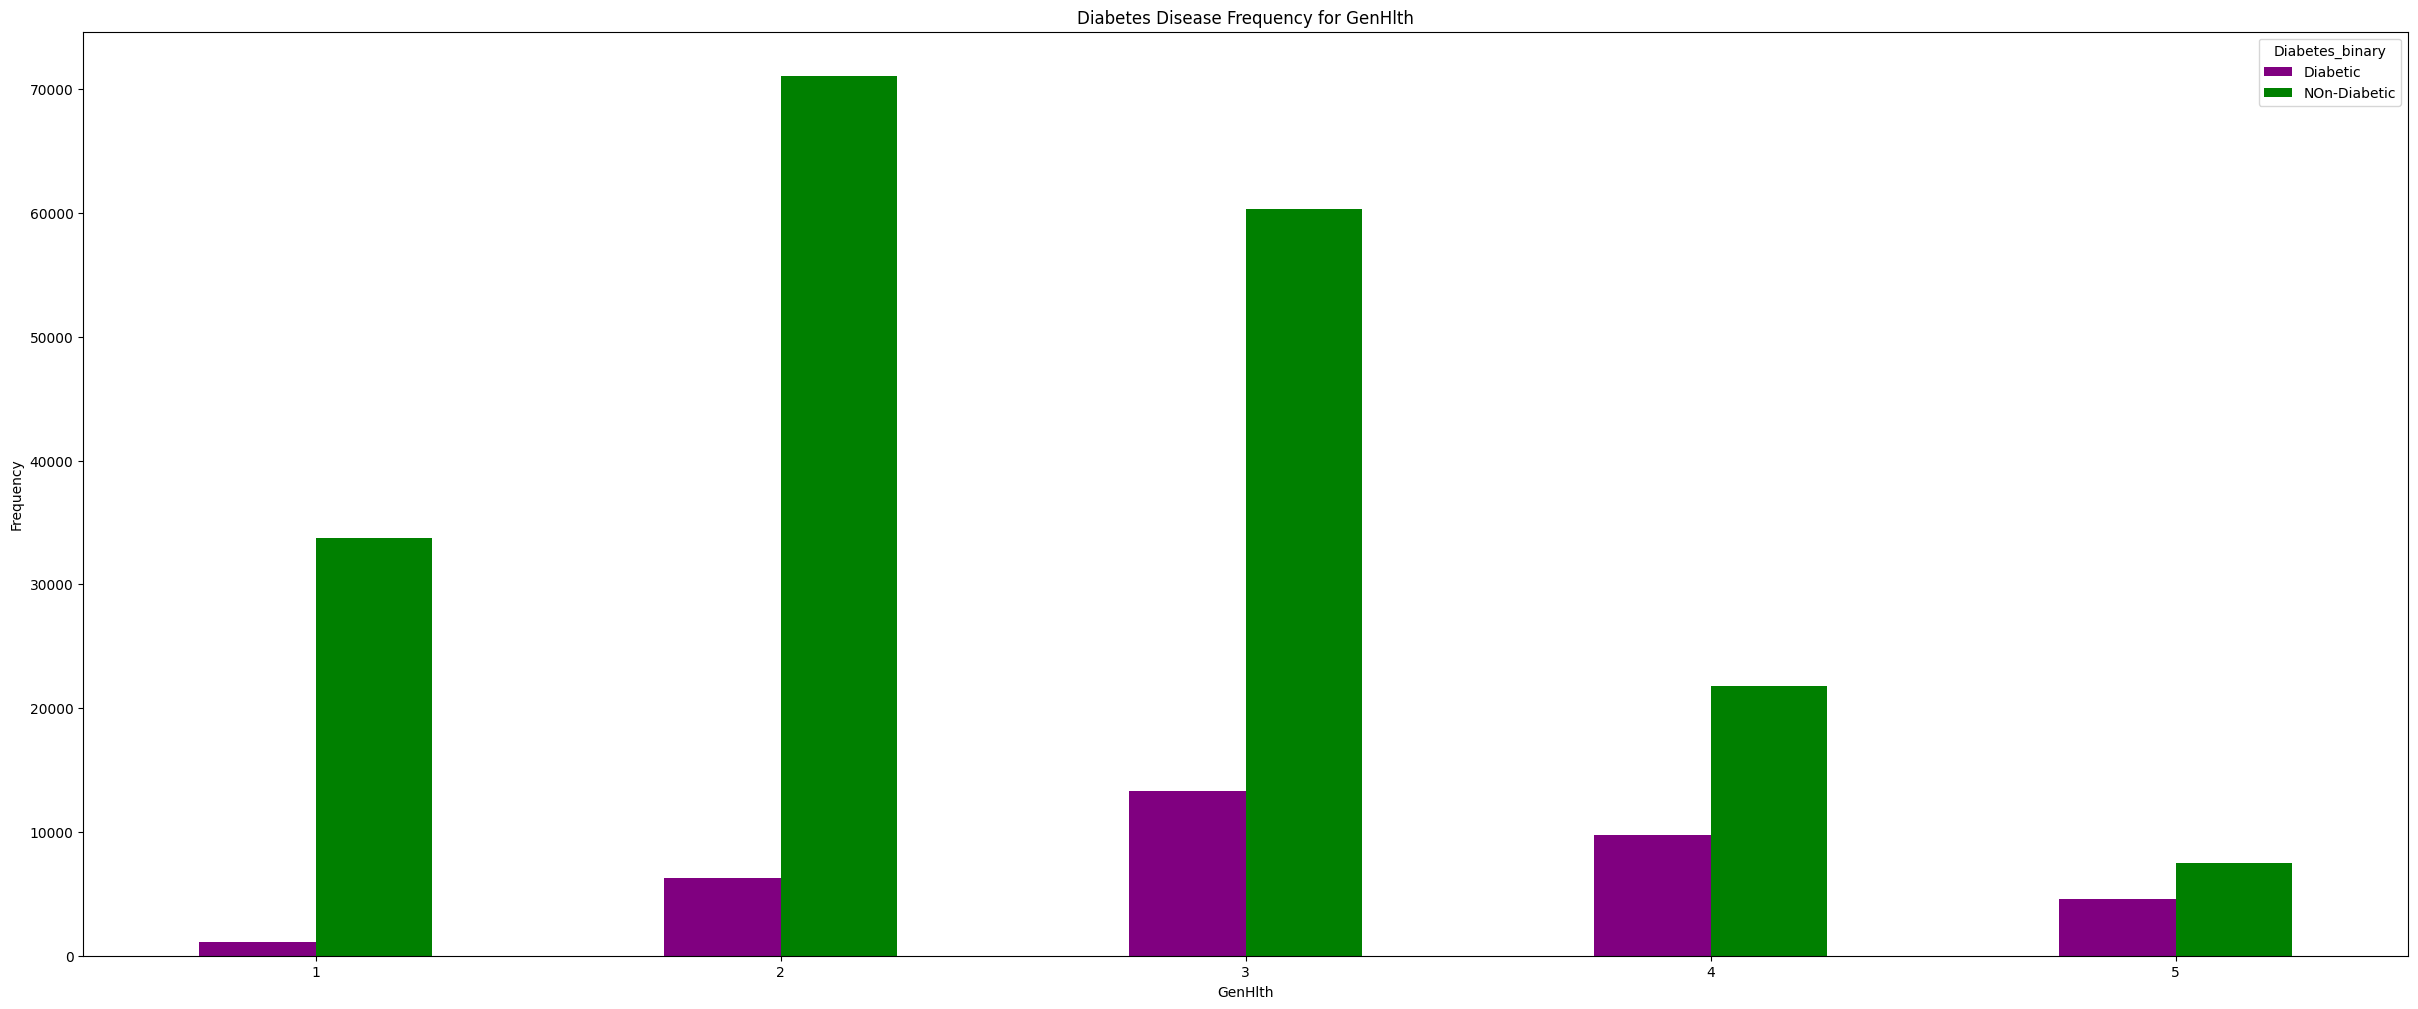

In [ ]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

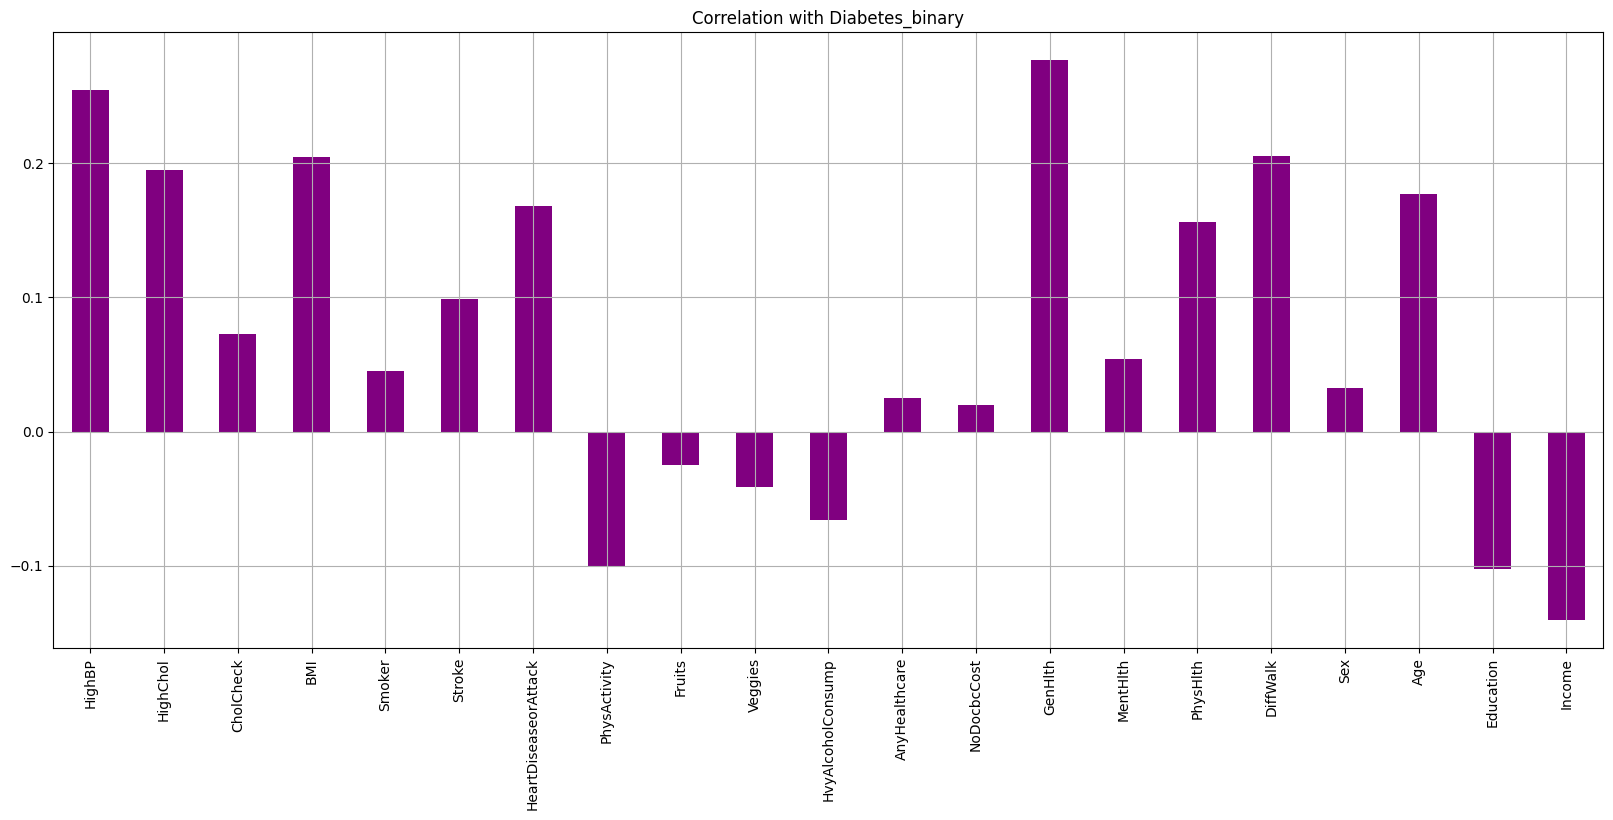

In [ ]:
# Convert 'Diabetes_binary' back to numeric for correlation calculation
data['Diabetes_binary'] = data['Diabetes_binary'].replace({'NOn-Diabetic': 0, 'Diabetic': 1})

data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Purple");

In [ ]:
data.shape

(229474, 22)

In [ ]:
print(data['Diabetes_binary'].value_counts())

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64


In [ ]:
# # Calculate the correlation with 'Diabetes_binary'
# correlations = data.corr(numeric_only=True)['Diabetes_binary']

# # Select columns with correlation >= 0.1 or <= -0.1 (excluding Diabetes_binary itself)
# selected_cols = correlations[(correlations >= 0.1) | (correlations <= -0.1)].index.tolist()
# selected_cols.remove('Diabetes_binary') # Remove the target variable from the list

# # Create a new DataFrame with the selected columns and the target variable
# data = data[selected_cols + ['Diabetes_binary']]

# # Display the first few rows of the new DataFrame
display(data.head())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
# Separate features and target
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Identify the minority and majority classes
minority_class = y.value_counts().idxmin()
majority_class = y.value_counts().idxmax()

# Separate the minority and majority class samples
minority_samples = data[data['Diabetes_binary'] == minority_class]
majority_samples = data[data['Diabetes_binary'] == majority_class]

# Downsample the majority class
from sklearn.utils import resample
majority_downsampled = resample(majority_samples,
                                replace=False,  # sample without replacement
                                n_samples=len(minority_samples),  # to match minority class size
                                random_state=42) # for reproducibility

# Combine minority class with downsampled majority class
data = pd.concat([minority_samples, majority_downsampled])

# Display the new class distribution
print("Class distribution after downsampling:")
print(data['Diabetes_binary'].value_counts())

Class distribution after downsampling:
Diabetes_binary
1    35097
0    35097
Name: count, dtype: int64


In [ ]:
# Separate features and target from the downsampled data
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Split the downsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (56155, 21)
Shape of X_test: (14039, 21)
Shape of y_train: (56155,)
Shape of y_test: (14039,)


# **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))


0.7089128305582763
0.7061756535365766


In [ ]:
y_preds = gnb.predict(X_test)

In [ ]:
y_preds

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.706
Precision: 0.697
Recall: 0.729
F1 Score: 0.713


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Return a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )

    disp.plot(values_format='')
    plt.show()

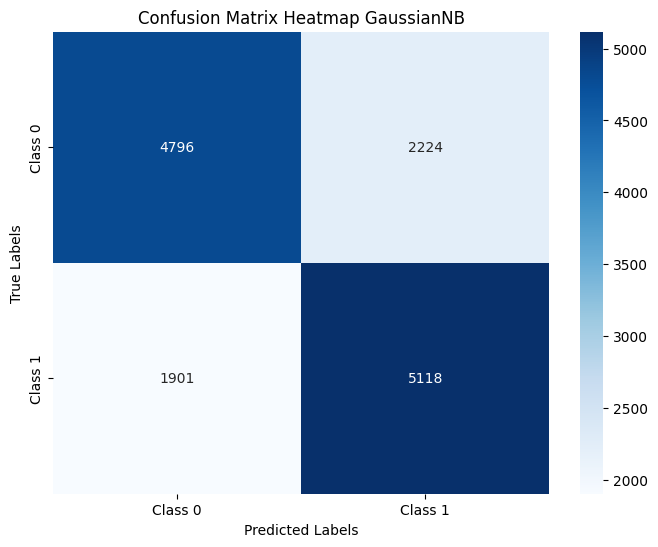

              precision    recall  f1-score   support

     Class 0       0.72      0.68      0.70      7020
     Class 1       0.70      0.73      0.71      7019

    accuracy                           0.71     14039
   macro avg       0.71      0.71      0.71     14039
weighted avg       0.71      0.71      0.71     14039

Accuracy: 70.62%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_preds)
report = classification_report(y_test, y_preds, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap GaussianNB')
plt.show()

# Display classification report
print(report)

# Calculate and display accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Train Accuracy:', '%.3f' % knn.score(X_train, y_train))
print('Test Accuracy:', '%.3f' % knn.score(X_test, y_test))

Train Accuracy: 0.781
Test Accuracy: 0.685


In [ ]:
#Hyperparameter tuning (GridsearchCV)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search, only for n_neighbors
param_grid = {'n_neighbors': range(1, 21, 2)  }


# Set up the GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21, 2)}, scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best cross-validation score: {best_score:.3f}")
print(f"Best n_neighbors: {best_n_neighbors}")

Best cross-validation score: 0.711
Best n_neighbors: 19


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors= 19 )
knn_best.fit(X_train, y_train)


# Evaluate the model on the test set
print("test-set score:{:.3f}".format(knn_best.score(X_test, y_test)))

test-set score:0.708


In [ ]:
y_preds = knn_best.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.708
Precision: 0.689
Recall: 0.759
F1 Score: 0.722


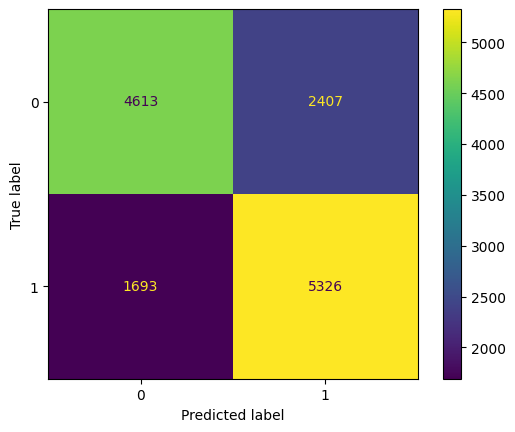

In [ ]:
conf_matrix_plot(knn_best, X_test, y_test)

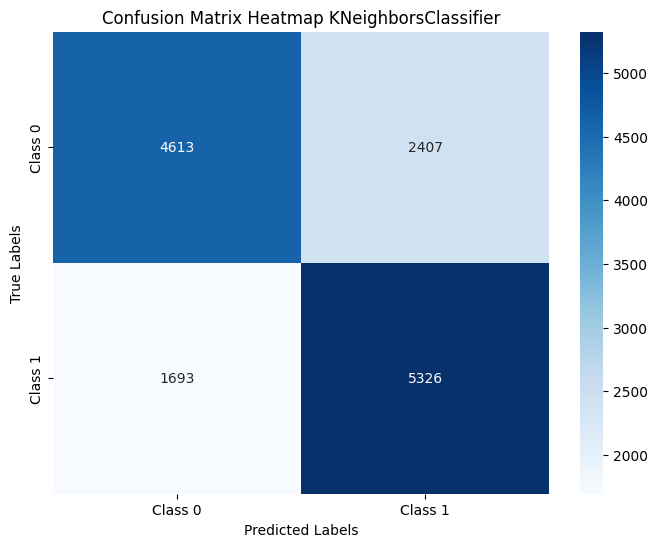

              precision    recall  f1-score   support

     Class 0       0.73      0.66      0.69      7020
     Class 1       0.69      0.76      0.72      7019

    accuracy                           0.71     14039
   macro avg       0.71      0.71      0.71     14039
weighted avg       0.71      0.71      0.71     14039

Accuracy: 70.80%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_preds)
report = classification_report(y_test, y_preds, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap KNeighborsClassifier')
plt.show()

# Display classification report
print(report)

# Calculate and display accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
print("KNeighborsClassifier Model (All Features):")
print("Tuned KNN (Best n_neighbors={}) Train Accuracy:{:.3f}".format(best_n_neighbors, knn_best.score(X_train, y_train)))
print("Tuned KNN (Best n_neighbors={}) Test Accuracy:{:.3f}".format(best_n_neighbors, knn_best.score(X_test, y_test)))

KNeighborsClassifier Model (All Features):
Tuned KNN (Best n_neighbors=19) Train Accuracy:0.742
Tuned KNN (Best n_neighbors=19) Test Accuracy:0.708


In [ ]:
y_preds_series = pd.Series(y_preds)

# Now you can use value_counts()
y_preds_series.value_counts()

,count
1,7733
0,6306


In [ ]:
# Create a new DataFrame with the specified columns
food_data = data[['Diabetes_binary', 'Smoker', 'HvyAlcoholConsump', 'Fruits', 'Veggies']]

# Display the first few rows of the new DataFrame
display(food_data.head())

,Diabetes_binary,Smoker,HvyAlcoholConsump,Fruits,Veggies
8,1,1,0,1,1
10,1,1,0,1,1
13,1,0,0,0,1
17,1,1,0,0,0
23,1,0,0,1,1


In [ ]:
# Separate features and target from the downsampled data
X_food = food_data.drop('Diabetes_binary', axis=1)
y_food = food_data['Diabetes_binary']

# Split the downsampled data into training and testing sets
X_train_food, X_test_food, y_train_food, y_test_food = train_test_split(X_food, y_food, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train_food.shape)
print("Shape of X_test:", X_test_food.shape)
print("Shape of y_train:", y_train_food.shape)
print("Shape of y_test:", y_test_food.shape)

Shape of X_train: (56155, 4)
Shape of X_test: (14039, 4)
Shape of y_train: (56155,)
Shape of y_test: (14039,)


In [ ]:
# Create KNN model
knn_food = KNeighborsClassifier()

# Train the model
knn_food.fit(X_train_food, y_train_food)

KNeighborsClassifier()

In [ ]:
print('Train Accuracy:', '%.3f' % knn_food.score(X_train_food, y_train_food))
print('Test Accuracy:', '%.3f' % knn_food.score(X_test_food, y_test_food))

Train Accuracy: 0.530
Test Accuracy: 0.529


In [ ]:
#Hyperparameter tuning (GridsearchCV)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search, only for n_neighbors
param_grid_food = {'n_neighbors': range(1, 21, 2)  }


# Set up the GridSearchCV
grid_search_food = GridSearchCV(knn_food, param_grid_food, cv=10, scoring='accuracy')

# Fit the grid search
grid_search_food.fit(X_train_food, y_train_food)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21, 2)}, scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_n_neighbors_food = grid_search_food.best_params_['n_neighbors']
best_score_food = grid_search_food.best_score_

print(f"Best cross-validation score: {best_score_food:.3f}")
print(f"Best n_neighbors: {best_n_neighbors_food}")

Best cross-validation score: 0.541
Best n_neighbors: 17


In [ ]:
knn_best_food = KNeighborsClassifier(n_neighbors= 17 )
knn_best_food.fit(X_train_food, y_train_food)


# Evaluate the model on the test set
print("test-set score:{:.3f}".format(knn_best_food.score(X_test_food, y_test_food)))

test-set score:0.549


In [ ]:
y_preds_food = knn_best_food.predict(X_test_food)
y_preds_food

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
print('Accuracy:', '%.3f' % accuracy_score(y_test_food, y_preds_food))
print('Precision:', '%.3f' % precision_score(y_test_food, y_preds_food))
print('Recall:', '%.3f' % recall_score(y_test_food, y_preds_food))
print('F1 Score:', '%.3f' % f1_score(y_test_food, y_preds_food))

Accuracy: 0.549
Precision: 0.536
Recall: 0.732
F1 Score: 0.619


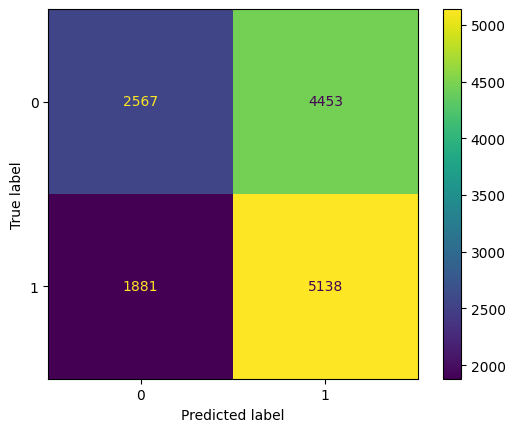

In [ ]:
conf_matrix_plot(knn_best_food, X_test_food, y_test_food)

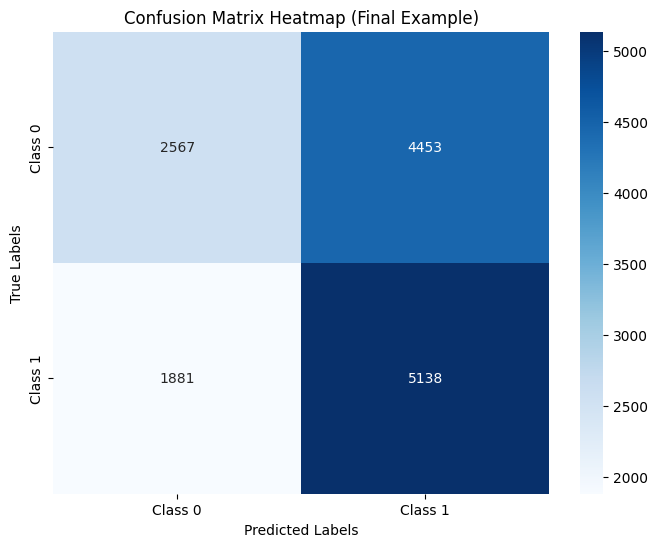

              precision    recall  f1-score   support

     Class 0       0.58      0.37      0.45      7020
     Class 1       0.54      0.73      0.62      7019

    accuracy                           0.55     14039
   macro avg       0.56      0.55      0.53     14039
weighted avg       0.56      0.55      0.53     14039

Accuracy: 54.88%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_food = confusion_matrix(y_test_food, y_preds_food)
report_food = classification_report(y_test_food, y_preds_food, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_food, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Final Example)')
plt.show()

# Display classification report
print(report_food)

# Calculate and display accuracy
accuracy_food = (conf_matrix_food[0, 0] + conf_matrix_food[1, 1]) / conf_matrix_food.sum()
print(f"Accuracy: {accuracy_food * 100:.2f}%")

In [ ]:
# Create a new DataFrame with the specified columns
hlth_data = data[['Diabetes_binary', 'HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack','GenHlth','MentHlth','PhysHlth']]

# Display the first few rows of the new DataFrame
display(hlth_data.head())

,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth
8,1,1,1,0,1,5,30,30
10,1,0,0,0,0,3,0,0
13,1,1,1,0,0,4,0,0
17,1,0,0,0,0,2,0,0
23,1,1,0,0,0,1,0,0


In [ ]:
hlth_data.shape

(70194, 8)

In [ ]:
# Separate features and target from the downsampled data
X_hlth = hlth_data.drop('Diabetes_binary', axis=1)
y_hlth = hlth_data['Diabetes_binary']

# Split the downsampled data into training and testing sets
X_train_hlth, X_test_hlth, y_train_hlth, y_test_hlth = train_test_split(X_hlth, y_hlth, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train_hlth.shape)
print("Shape of X_test:", X_test_hlth.shape)
print("Shape of y_train:", y_train_hlth.shape)
print("Shape of y_test:", y_test_hlth.shape)

Shape of X_train: (56155, 7)
Shape of X_test: (14039, 7)
Shape of y_train: (56155,)
Shape of y_test: (14039,)


In [ ]:
# Create KNN model
knn_hlth = KNeighborsClassifier()

# Train the model
knn_hlth.fit(X_train_hlth, y_train_hlth)

KNeighborsClassifier()

In [ ]:
print('Train Accuracy:', '%.3f' % knn_hlth.score(X_train_hlth, y_train_hlth))
print('Test Accuracy:', '%.3f' % knn_hlth.score(X_test_hlth, y_test_hlth))

Train Accuracy: 0.708
Test Accuracy: 0.679


In [ ]:
#Hyperparameter tuning (GridsearchCV)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search, only for n_neighbors
param_grid_hlth = {'n_neighbors': range(1, 21, 2)  }


# Set up the GridSearchCV
grid_search_hlth = GridSearchCV(knn_hlth, param_grid_hlth, cv=10, scoring='accuracy')

# Fit the grid search
grid_search_hlth.fit(X_train_hlth, y_train_hlth)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21, 2)}, scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_n_neighbors_hlth = grid_search_hlth.best_params_['n_neighbors']
best_score_hlth = grid_search_hlth.best_score_

print(f"Best cross-validation score: {best_score_hlth:.3f}")
print(f"Best n_neighbors: {best_n_neighbors_hlth}")

Best cross-validation score: 0.696
Best n_neighbors: 19


In [ ]:
knn_best_hlth = KNeighborsClassifier(n_neighbors= 19 )
knn_best_hlth.fit(X_train_hlth, y_train_hlth)


# Evaluate the model on the test set
print("test-set score:{:.3f}".format(knn_best_hlth.score(X_test_hlth, y_test_hlth)))

test-set score:0.697


In [ ]:
y_preds_hlth = knn_best_hlth.predict(X_test_hlth)
y_preds_hlth

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print('Accuracy:', '%.3f' % accuracy_score(y_test_hlth, y_preds_hlth))
print('Precision:', '%.3f' % precision_score(y_test_hlth, y_preds_hlth))
print('Recall:', '%.3f' % recall_score(y_test_hlth, y_preds_hlth))
print('F1 Score:', '%.3f' % f1_score(y_test_hlth, y_preds_hlth))

Accuracy: 0.697
Precision: 0.676
Recall: 0.756
F1 Score: 0.714


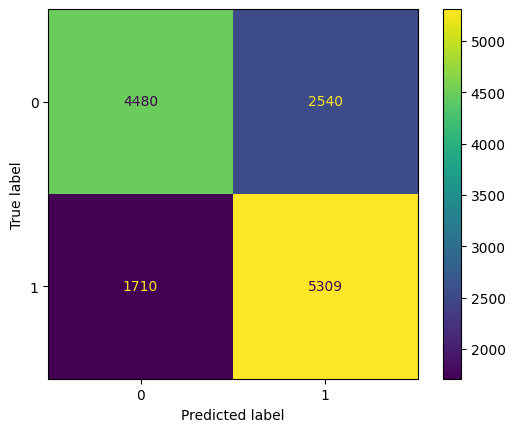

In [ ]:
conf_matrix_plot(knn_best_hlth, X_test_hlth, y_test_hlth)

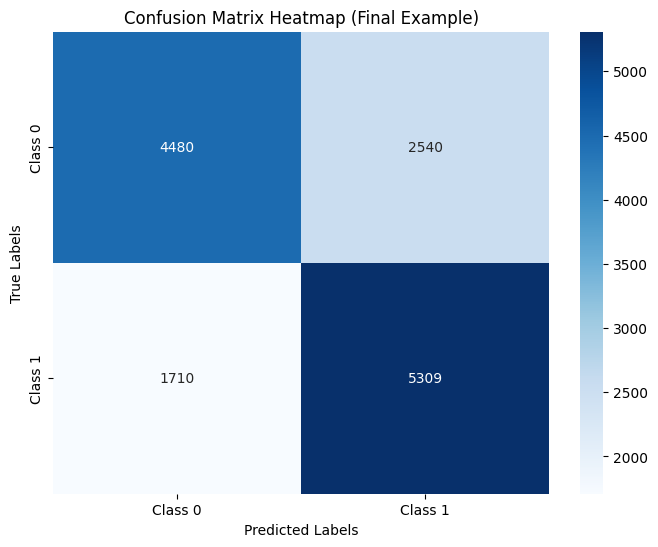

              precision    recall  f1-score   support

     Class 0       0.72      0.64      0.68      7020
     Class 1       0.68      0.76      0.71      7019

    accuracy                           0.70     14039
   macro avg       0.70      0.70      0.70     14039
weighted avg       0.70      0.70      0.70     14039

Accuracy: 69.73%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_hlth = confusion_matrix(y_test_hlth, y_preds_hlth)
report_hlth = classification_report(y_test_hlth, y_preds_hlth, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_hlth, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Final Example)')
plt.show()

# Display classification report
print(report_hlth)

# Calculate and display accuracy
accuracy_hlth = (conf_matrix_hlth[0, 0] + conf_matrix_hlth[1, 1]) / conf_matrix_hlth.sum()
print(f"Accuracy: {accuracy_hlth * 100:.2f}%")

In [ ]:
# Create a new DataFrame with the specified columns
know_data = data[['Diabetes_binary', 'AnyHealthcare', 'NoDocbcCost', 'Education', 'Income']]

# Display the first few rows of the new DataFrame
display(know_data.head())

,Diabetes_binary,AnyHealthcare,NoDocbcCost,Education,Income
8,1,1,0,5,1
10,1,1,0,6,8
13,1,1,0,4,6
17,1,1,0,5,6
23,1,1,0,5,4


In [ ]:
# Separate features and target from the downsampled data
X_know = know_data.drop('Diabetes_binary', axis=1)
y_know = know_data['Diabetes_binary']

# Split the downsampled data into training and testing sets
X_train_know, X_test_know, y_train_know, y_test_know = train_test_split(X_know, y_know, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train_know.shape)
print("Shape of X_test:", X_test_know.shape)
print("Shape of y_train:", y_train_know.shape)
print("Shape of y_test:", y_test_know.shape)

Shape of X_train: (56155, 4)
Shape of X_test: (14039, 4)
Shape of y_train: (56155,)
Shape of y_test: (14039,)


In [ ]:
# Create KNN model
knn_know = KNeighborsClassifier()

# Train the model
knn_know.fit(X_train_know, y_train_know)

KNeighborsClassifier()

In [ ]:
print('Train Accuracy:', '%.3f' % knn_know.score(X_train_know, y_train_know))
print('Test Accuracy:', '%.3f' % knn_know.score(X_test_know, y_test_know))

Train Accuracy: 0.569
Test Accuracy: 0.559


In [ ]:
#Hyperparameter tuning (GridsearchCV)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search, only for n_neighbors
param_grid_know = {'n_neighbors': range(1, 21, 2)  }


# Set up the GridSearchCV
grid_search_know = GridSearchCV(knn_know, param_grid_know, cv=10, scoring='accuracy')

# Fit the grid search
grid_search_know.fit(X_train_know, y_train_know)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21, 2)}, scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_n_neighbors_know = grid_search_know.best_params_['n_neighbors']
best_score_know = grid_search_know.best_score_

print(f"Best cross-validation score: {best_score_know:.3f}")
print(f"Best n_neighbors: {best_n_neighbors_know}")

Best cross-validation score: 0.563
Best n_neighbors: 19


In [ ]:
knn_best_know = KNeighborsClassifier(n_neighbors= 19 )
knn_best_know.fit(X_train_know, y_train_know)


# Evaluate the model on the test set
print("test-set score:{:.3f}".format(knn_best_know.score(X_test_know, y_test_know)))

test-set score:0.567


In [ ]:
y_preds_know = knn_best_know.predict(X_test_know)
y_preds_know

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Accuracy:', '%.3f' % accuracy_score(y_test_know, y_preds_know))
print('Precision:', '%.3f' % precision_score(y_test_know, y_preds_know))
print('Recall:', '%.3f' % recall_score(y_test_know, y_preds_know))
print('F1 Score:', '%.3f' % f1_score(y_test_know, y_preds_know))

Accuracy: 0.567
Precision: 0.574
Recall: 0.517
F1 Score: 0.544


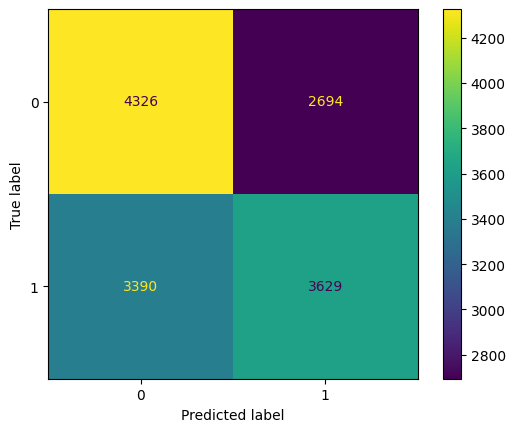

In [ ]:
conf_matrix_plot(knn_best_know, X_test_know, y_test_know)

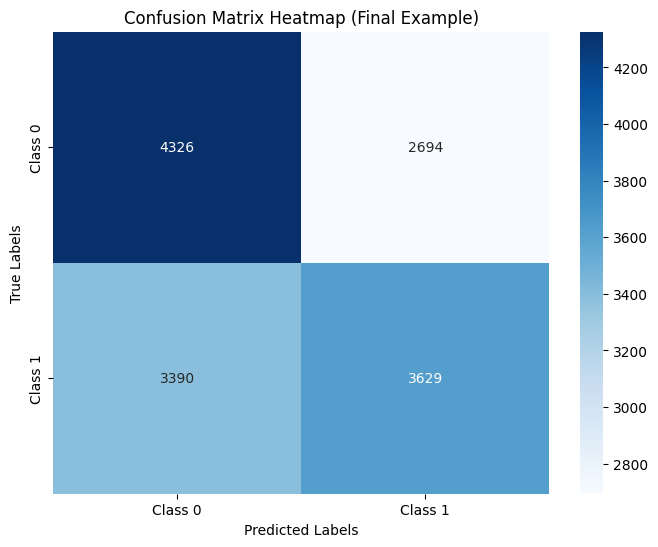

              precision    recall  f1-score   support

     Class 0       0.56      0.62      0.59      7020
     Class 1       0.57      0.52      0.54      7019

    accuracy                           0.57     14039
   macro avg       0.57      0.57      0.57     14039
weighted avg       0.57      0.57      0.57     14039

Accuracy: 56.66%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_know = confusion_matrix(y_test_know, y_preds_know)
report_know = classification_report(y_test_know, y_preds_know, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_know, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Final Example)')
plt.show()

# Display classification report
print(report_know)

# Calculate and display accuracy
accuracy_know = (conf_matrix_know[0, 0] + conf_matrix_know[1, 1]) / conf_matrix_know.sum()
print(f"Accuracy: {accuracy_know * 100:.2f}%")